<a href="https://colab.research.google.com/github/uankit/Linear_Model_Scratch/blob/main/LinearRegressionScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression From Scratch**
    1. Change the number of observations to 100,000 and see what happens.
    2. Change the number of observations to 1,000,000 and see what happens.
    3. Play around with the learning rate. Values like 0.0001, 0.001, 0.1, 1 are all interesting to observe. 
    4. Change the loss function. L2-norm loss (without dividing by 2) is a good way to start. 
    5. Тry with the L1-norm loss, given by the sum of the ABSOLUTE value of yj - tj. The L1-norm loss is given by:
## $$ \Sigma_i = |y_i-t_i| $$
    6. Create a function f(x0,x1,x2) = 8*x0 + 2*x1 - 4*x2 + 5. Does the algorithm work in the same way?

### **Import the relevant libraries**

In [136]:
# We must always import the relevant libraries for our problem at hand. NumPy is a must for this example.

import numpy as np

# matplotlib for the sole purpose of visualizing the results.  

import matplotlib.pyplot as plt

### **Generate random input data to train on**

In [137]:
# First, we should declare a variable containing the size of the training set we want to generate.

obs = 5000
    
# We will work with three variables as inputs.
# We generate them randomly, drawing from an uniform distribution.
# The size of x0 , x1 and x2 is observations by 1. In this case: 5000 x 1.

x0 = np.random.uniform(-10 , 10 , (obs,1))
x1 = np.random.uniform(-10 , 10 , (obs,1))
x2 = np.random.uniform(-10 , 10 , (obs,1))

# Combine the two dimensions of the input into one input matrix. 
# This is the X matrix from the linear model y = x*w + b.
# column_stack is a Numpy method, which combines two vectors into a matrix.

inputs = np.column_stack((x0,x1,x2))
print(inputs.shape)

(5000, 3)


### **Generate the targets**

In [138]:
# We want to "make up" a function, use the ML methodology, and see if the algorithm has learned it.
# We add a small random noise to the function i.e. f(x0,x1,x2) = 8*x0 + 2*x1 - 4*x2 + 5  + <small noise>

noise = np.random.uniform(-2,2,(obs,1))

# Produce the targets according to the f(x0,x1,x2) = 8*x0 + 2*x1 - 4*x2 + 5  + noise definition.
# In this way, we are basically saying: the weights should be 8 , 2 and -4, while the bias is 5.

target =  8*x0 + 2*x1 - 4*x2 + 5 + noise

### **Initialize variables**

In [139]:
# Weights are of size k x m, where k is the number of input variables and m is the number of output variables

weights = np.random.uniform(-1,1,size=(3,1))

# Biases are of size 1 since there is only 1 output. The bias is a scalar.

bias = np.random.uniform(-1,1,size=1)

print(weights)
print(bias)

[[-0.98116898]
 [ 0.75552891]
 [-0.50497357]]
[-0.98168236]


### **Set a learning rate**

In [140]:
# Set some small learning rate . 
# 0.02 is going to work quite well for our example.

learning_rate = 0.02

### **Train the model**

In [141]:
# We iterate over our training dataset 100 times. That works well with a learning rate of 0.02.
# a lower learning rate would need more iterations, while a higher learning rate would need less iterations

for i in range(100):

  # This is the linear model: y = xw + b equation

  output = np.dot(inputs , weights)+bias

  # The deltas are the differences between the outputs and the targets

  deltas = output - target

  # We are considering the L2-norm loss, but divided by 2.
  # Moreover, we further divide it by the number of observations.
  # This is simple rescaling by a constant. This doesn't change the optimization logic,
  # as any function holding the basic property of being lower for better results, and higher for worse results
  # can be a loss function.

  loss = np.sum(deltas**2)/2/obs

  # We print the loss function value at each step so we can observe whether it is decreasing as desired.

  print(loss)

  # Another small trick is to scale the deltas the same way as the loss function
  # In this way our learning rate is independent of the number of samples (observations).
  # Again, this doesn't change anything in principle, it simply makes it easier to pick a single learning rate
  # that can remain the same if we change the number of training samples (observations).

  deltas_scaled = deltas/obs

  # Finally, we must apply the gradient descent update rules
  
  weights = weights - learning_rate*np.dot(inputs.T , deltas_scaled)
  bias = bias - learning_rate * np.sum(deltas_scaled)

1570.0435198914793
197.1737793403677
38.045350973824455
19.049338563118418
16.290633031222743
15.43666551575106
14.825085376834442
14.261983825833624
13.723998776079856
13.207637633552821
12.711753012976608
12.235500389846338
11.778098733726418
11.33880144316067
10.916891879088482
10.511681815739355
10.122510273485382
9.748742435434668
9.389768611306023
9.045003242830203
8.71388394857847
8.395870606604815
8.09044447339868
7.797107337710276
7.515380707868133
7.244805031263325
6.98493894472697
6.735358554578472
6.4956567451699625
6.26544251479903
6.044340337906567
5.83198955251934
5.628043771937973
5.43217031971082
5.244049686971984
5.063375011258303
4.889851575955155
4.723196329554604
4.563137423941597
4.409413770955248
4.261774616501691
4.119979131523871
3.983796019161078
3.853003137457415
3.7273871370037517
3.6067431129220116
3.4908742706243028
3.379591604801462
3.272713591117497
3.1700658901070495
3.0714810627927447
2.9767982975586347
2.885863147834281
2.7985272801613763
2.7146482322

### **Print weights and biases and see if we have worked correctly.**

In [142]:
# We print the weights and the biases, so we can see if they have converged to what we wanted.

print(weights,bias)

# Note that they may be convergING. So more iterations are needed.

[[ 7.9956069 ]
 [ 1.99705419]
 [-4.00000549]] [4.19334287]


```
Here the weights are as follows : 7.99 , 1.99 , -4.00 , 4.19 
which is very close to our desired target equation weights : 8.00 , 2.00 , -4.00 , 5.00
```



### **Plot last outputs vs targets**
Since they are the last ones at the end of the training, they represent the final model accuracy. <br/>
The closer this plot is to a 45 degree line, the closer target and output values are.

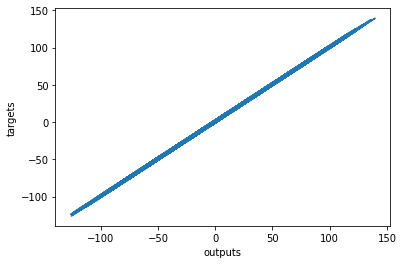

In [143]:
# We print the outputs and the targets in order to see if they have a linear relationship.

plt.plot(output,target)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()